## Сборный проект. Исследование рынка российского кинопроката
Заказчиком данного исследования является Министерство культуры Российской Федерации
В нашем распоряжении набор данных, размещенные в открытом доступе на сайте Министерства культуры, содержащие информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. Задачей стоит изучение рынка российского кинопроката и выявление трендов, уделив особое внимание фильмам, получившим государственную поддержку. Полученные выводы из этого исследования помогут выявить насколько такие фильмы интересны зрителю

### Цель исследования
1. Выявить тренды среди фильмов
2. Построить и доказать собственные гипотезы, которые помогут улучшить российский кинопрокат, а также сервис Кинопоиск
3. Установить какие параметры влияют на успешность фильма

### Ход исследования
Данные о прокатных удостоверениях я получу из файла '/datasets/mkrf_movies.csv', а данные о прокате в российских кинотеатрах из файла '/datasets/mkrf_shows.csv'. О качестве данных нет никакой информации. Поэтому прежде чем приступить к анализу, понадобиться обзор данных, чтобы полученные в конечном итоге результаты были достоверны

Проверка данных будет на пропуски, дубликаты, соответствие типов данных, а также на наличие аномалий. В дальнейшем будут подобраны возможные пути устранения подобных дефектов для дальнейшего анализа. После обработки данных, я добавлю новые столбцы и приступлю к анализу

Поэтому мое исследование будет иметь следующий порядок действий:
1. Создание единой базы
2. Предобработка данных
3. Добавление новых колонок в таблицу
4. Изучение динамики проката по годам
5. Изучение сборов по годам
6. Оценка влияния возрастного ограничения на сборы
7. Поиск закономерностей и предложение гипотез для фильмов с государственной поддержкой
8. Написание общего вывода

In [1]:
import pandas as pd
import matplotlib as mtb
import seaborn as sns
import numpy as np
import re
import statistics
import matplotlib.pyplot as plt
pd.options.display.float_format ='{:.2f}'.format
pd.set_option('max_colwidth', 9120)
pd.set_option('display.width', 9500)

## Шаг 1. Откройте файлы с данными и объедините их в один датафрейм

Прежде чем создавать единый датафрейм, скачаем csv таким образом, чтобы программа запускалась где угодно без внесения корректировок:

In [2]:
try:
    mkrf_movies_df = pd.read_csv('mkrf_movies.csv')
    mkrf_shows_df = pd.read('mkrf_shows.csv')
except: 
    mkrf_movies_df = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
    mkrf_shows_df = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

Проверим, что файлы считались корректно:

In [3]:
mkrf_movies_df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
mkrf_shows_df.head()

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


Для того чтобы в будущем объединить эти 2 датафрейма проверим что типы ключевого столбца совпадают

In [5]:
mkrf_movies_df.info()
mkrf_shows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Как мы видим, типы не совпадают. Поэтому изменим тип столбца puNumber в датафрейме data1 на int64. Однако прежде проверим, что в датафрейме data1 нет значений помимо целочисленных:

In [6]:
mkrf_movies_df[mkrf_movies_df['puNumber'].str.isdigit() == False]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Как мы видим, в строке 1797 стоит значение "нет", заменим его на -1. В строке 804 как мы видим есть целочисленное значение, однако он попал в выборку. Вполне возможно там есть пробел, устраним его

In [7]:
mkrf_movies_df.loc[804, 'puNumber'] = mkrf_movies_df.loc[804, 'puNumber'].strip()
mkrf_movies_df.loc[mkrf_movies_df['puNumber'] == 'нет', 'puNumber'] = -1

Проверим, что изменения применились успешно:

In [8]:
mkrf_movies_df[mkrf_movies_df['puNumber'].str.isdigit() == False]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


Применим astype для изменения типа столбца:

In [9]:
mkrf_movies_df['puNumber'] = pd.to_numeric(mkrf_movies_df['puNumber'], errors= 'coerce')

Проверим, что формат изменился успешно:

In [10]:
mkrf_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Объединим 2 датафрейма в один:

In [11]:
data = mkrf_movies_df.merge(mkrf_shows_df, on = 'puNumber', how = 'left')

In [12]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Объединение прошло успешно

## Шаг 2. Предобработка данных
- Проверьте типы данных в датафрейме и преобразуйте там, где это необходимо.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

show_start_date - дата премьеры фильма. В изначальной версии датафрейма данная колонка имеет тип object, что крайне нелогично поскольку это дата и должна иметь тип datetime. Поэтому было принято решение сменить тип данной колонки, убрав разделитель "T" 

In [14]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

ratings - рейтинг фильма на КиноПоиске. Изучив данную колонку было обнаружено что рейтинг здесь обозначен либо как десятичное число, либо как процент. На КиноПоиске все значения рейтингов указаны по десятибальной шкале, поэтому проценты переведем в десятибальное число разделив на 10

In [15]:
data['ratings'] = data['ratings'].astype('str')
data['ratings'] = data['ratings'].apply(lambda x: re.sub('%','', x))
data['ratings'] = data['ratings'].astype('float64')
data['ratings'] = np.where(data['ratings']>10, (data['ratings']/10), data['ratings'])

Проверим, что все изменения прошли успешно:

In [16]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN


- Изучите пропуски в датафрейме. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать.

Проверим в каких столбцах есть пропуски:

In [17]:
pd.DataFrame(round(data.isna().mean()*100,)).sort_values(by = 0).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
age_restriction,0.000000
producer,8.000000
ratings,13.000000


production_country -  страна производитель. Пропусков достаточно мало, однако заменим их значением 'Неизвестно'. Аналогично поступим со столбцами director - режиссёр, film_studio - студия-производитель, producer - продюсер, genres - жанр

In [18]:
data['production_country'] = data['production_country'].fillna('Неизвестно')
data['director'] = data['director'].fillna('Неизвестно')
data['film_studio'] = data['film_studio'].fillna('Неизвестно')
data['producer'] = data['producer'].fillna('Неизвестно')
data['genres'] = data['genres'].fillna('Неизвестно')

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Всё верно. Здесь можно применить цикл, чтобы не переписывать несколько раз код.</div>

ratings - рейтинги. Так как рейтинги является не параметром фильма, а зависимой от качества фильма величиной, замещать пропуски усредненными значениями не целесообразно. Поскольку таким образом можно искусственно исказить значущую выборку

box_office - сборы в рублях. В виду большого числа пропусков (а именно 58% значений) и того что это аналогично рейтингу значащий параметр, зависимость содержимого которого от других параметров, еще будет исследовано в ходе этого проекта, видится нецелесообразно искусственно заполнять пропуски усредненными значениями.

financing_source - источник государственного финансирования. Подавляющее большинство фильмов не получают государственную поддержку. Поэтому логичным кажется заполнить пропуска значением 'Отсутствует'

In [19]:
data[data['financing_source'].isna() == True].groupby('production_country')['production_country'].count().sort_values()

production_country
Польша - Франция - Испания - Бразилия - Швеция       1
США - Бельгия - Великобритания                       1
США - Болгария - Мексика                             1
США - Бразилия - Великобритания - Канада             1
США - Великобритания - Болгария                      1
                                                  ... 
Великобритания                                     257
Франция                                            301
СССР                                               347
Россия                                            1505
США                                               2172
Name: production_country, Length: 937, dtype: int64

In [20]:
(data[(data['production_country'] == 'Россия')&(data['financing_source']=='Отсутствует')]['production_country'].count()/data[data['production_country'] == 'Россия']['production_country'].count())*100

0.0

In [21]:
data['financing_source'] = data['financing_source'].fillna('Отсутствует')

refundable_support - объём возвратных средств государственной поддержки. В виду того что у многих фильмов нет источника государственного финансирования внутри РФ (поскольку многие фильмы указанные в базе произведены не в РФ), заполним пропуски значением 0

In [22]:
data['refundable_support'] = data['refundable_support'].fillna(0)

nonrefundable_support - объём невозвратных средств государственной поддержки. Здесь ситуация аналогична как и с refundable_support. Также заполним пропуски значением 0

In [23]:
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)

budget - общий бюджет фильма. Пропусков подавляющее большинство, тем самым мы не сможем достаточно подробно посчитать среднее. Нулем также заменять нецелесообразно, поскольку не бывает такого, чтобы у фильма не было бы бюджета. Поэтому оставим пропуски пустыми

Итого после обработки пропусков, осталось следующее количество пропусков:

In [24]:
pd.DataFrame(round(data.isna().mean()*100,)).sort_values(by = 0).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,0.000000
age_restriction,0.000000
refundable_support,0.000000


- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Для начала проверим наличие дублирующихся строк:

In [25]:
print('Количество дублирующихся строк:',data.duplicated().sum())

Количество дублирующихся строк: 0


Проверим колонки на наличие неявных дубликатов:

Уберем из колонки title все возможные знаки препинания и понизим регистр букв, чтобы убрать неявные дубликаты
Возможно фильмы были записаны по-разному потому что разные прокатчики записывают фильмы по-разному

In [26]:
data['title'] = data['title'].apply(lambda x: x.lower())
data['title'] = data['title'].apply(lambda x: re.sub('(_)|(/)|(\.)','', x))

In [27]:
data.loc[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксьон, Марс Дистрибусьон, Канал +",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,7.00,"мелодрама,комедия",NaN
4639,иоанна - женщина на папском престоле по роману донны вулфольк кросс,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,7.60,"драма,мелодрама,история",NaN
5067,анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,7.40,"комедия,криминал",NaN
5068,анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи-Пи Интертейнмент, Баалтимор Спринг Крик Пикчерз Фейс, Трайбека",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,6.80,"комедия,криминал",NaN


Обнаружились дубликаты в колонке с номером прокатного удостоверения, т.е. под одним номером существует не один фильм. Но таких дубликатов всего 4 штуки, устранять их не имеет смысла. Возможно просто кто-то ошибся, когда вводил информацию в базу

show_start_date не имеет смысла проверять, поскольку здесь исключены любые варианты неявных дубликатов. Да и в один день могут быть показаны разные фильмы

В колонке type обнаружились неявные дубликаты только по причине наличия лишнего пробела. Возможно также это возникло из-за человеческого фактора. Исправим эту ошибку

In [28]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [29]:
data['type']= data['type'].str.strip()

Проверим, что неявных дубликатов больше нет:

In [30]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Далее дубликаты обнаружились в колонке film_studio. Как например с ооо "мульт в кино". На первый взгляд возможно не видны различия, однако можно предположить, что после названия стоит лишний пробел. Попробуем устранить 

In [31]:
data['film_studio'] = data['film_studio'].apply(lambda x: x.lower())
data['film_studio'].value_counts().head(55)

киностудия "мосфильм"                                                               341
ооо "мульт в кино"                                                                   57
анимаккорд лтд                                                                       23
неизвестно                                                                           18
ооо "мульт в кино"                                                                   18
фгуп "тпо "киностудия "союзмультфильм"                                               16
ооо "таббак"                                                                         15
р а и синема                                                                         14
ооо "студия анимационного кино "мельница"                                            14
опус арте                                                                            14
ооо "кинокомпания "ств"                                                              13
пиксар анимейшн студиос, уолт ди

In [32]:
data['film_studio'] = data['film_studio'].str.strip()
data['film_studio'].value_counts().head(55)

киностудия "мосфильм"                                                               345
ооо "мульт в кино"                                                                   75
анимаккорд лтд                                                                       23
ооо "таббак"                                                                         18
неизвестно                                                                           18
фгуп "тпо "киностудия "союзмультфильм"                                               16
ооо "студия анимационного кино "мельница"                                            14
р а и синема                                                                         14
опус арте                                                                            14
ооо "кинокомпания "ств"                                                              13
пиксар анимейшн студиос, уолт дисней пикчерз                                         13
зао "аэроплан"                  

Как видно, данный вариант сработал. Возможно здесь также кто-то ошибся при внесении информации (легко всегда поставить лишний пробел, все с этим сталкивались)

production_country - страна производитель. Как можно заметить, здесь при комбинации стран производителей список написан либо через тире, либо через запятую. Также были замечены лишние пробелы. В данном случае удалим лишние пробелы и заменим все тире на запятые
Возможно причина подобных дубликатов в том, что заполнять могли разные люди и каждый привык записывать по-своему

In [33]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [34]:
data['production_country'] = data['production_country'].str.strip()
data['production_country'] = data['production_country'].apply(lambda x: re.sub('-',', ', x))
data['production_country'] = data['production_country'].apply(lambda x: re.sub(' ,',',', x))
data['production_country'] = data['production_country'].apply(lambda x: re.sub('  ',' ', x))

In [35]:
data['production_country'].value_counts().head(60)

США                             2175
Россия                          1821
СССР                             377
Франция                          302
Великобритания                   259
Италия                           131
Германия                         110
США, Великобритания              106
Япония                            77
Испания                           74
Франция, Бельгия                  70
Великобритания, США               55
США, Канада                       53
Канада                            52
США, Австралия                    51
Австралия                         50
США, Германия                     50
США, Франция                      41
КНР                               33
Республика Кипр                   31
Южная Корея                       25
Индия                             22
Италия, Франция                   21
Норвегия                          19
Россия, Республика Кипр           19
Канада, США                       18
Дания                             18
Ф

director - режиссёер. Здесь проблем кроме как лишних пробелов обнаружено не было (как в случае с "О.Семёнова", что продемонстрировано ниже). Было предположение что замена буквы ё на е поможет, но изменений обнаружено не было. Поэтому устраним только лишние пробелы. Возможная причина дубликатов - человеческий фактор

In [36]:
data['director'].value_counts()

О.Семёнова          47
Стивен Содерберг    17
Д.Червяцов          17
Ридли Скотт         16
Тиль Швайгер        14
                    ..
Шрирам Рагхаван      1
Айван Райтман        1
И.Триф               1
Юлиан Радльмайер     1
В.Федоров            1
Name: director, Length: 4812, dtype: int64

In [37]:
data['director'] = data['director'].str.strip()

Проверка на корректное срабатывание изменений:

In [38]:
data['director'].value_counts().head(50)

О.Семёнова               60
Стивен Содерберг         17
Д.Червяцов               17
Ридли Скотт              16
Тиль Швайгер             14
Питер Джексон            13
Клинт Иствуд             13
Вуди Аллен               13
Кевин Смит               12
Люк Бессон               12
Дэвид Финчер             12
Стивен Спилберг          12
Гай Ричи                 11
П.Смирнов                11
Кристофер Нолан          11
Саймон Уэст              11
С.Андреасян              10
Тьерри Гиллиам           10
Л.Гайдай                 10
Николас Столлер          10
Роберт Земекис           10
Джеймс Ван               10
Роберт Швентке           10
Тодд Филлипс              9
Франсуа Озон              9
Неизвестно                9
Дэвид Йейтс               9
Питер Берг                9
Брэд Пейтон               8
Мартин Скорсезе           8
Роберт Родригес           8
Зак Снайдер               8
Эндрю Никкол              8
Пол Гринграсс             8
Гильермо дель Торо        8
Георгий Орлов       

В колонке producer ситуация аналогичная как и director. Поэтому просто уберем лишние пробелы

In [39]:
data['producer'] = data['producer'].str.strip()

В age_restriction, financing_source, так и в genres неявных дубликатов обнаружено не было

In [40]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [41]:
data['financing_source'].unique()

array(['Отсутствует', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [42]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'Неизвестно', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ко

После проверки всех возможных столбцов на неявные дубликаты, проверим финально датафрейм на наличие дублирующихся строк:

In [43]:
print('Количество дублирующихся строк:',data.duplicated().sum())

Количество дублирующихся строк: 0


- Изучите столбцы, которые содержат категориальные значения:
  - Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
  - Исправьте проблемные значения в поле type.

### Уже сделано выше

- Изучите столбцы, которые хранят количественные значения. Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

В процессе обработки данных была замечена следующая аномалия. При государственной поддержке, есть объем возвратных и невозвратных средств, при всем при этом бюджет фильма равен 0. Такое не может быть

Также было обнаружено что это единственные строки датафрейма, где бюджет равен 0

In [44]:
data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ооо киностудия ""сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10
2058,дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00
2472,воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40
2532,бармен,111009615,2015-05-26 12:00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418974.80
2615,савва сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40
2684,тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ооо ""кинокомпания ""коктебель""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.30,"комедия,драма",1957738.51
2788,срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937783.20
2874,помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ооо ""кинофирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,15362931.43
3047,любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299052.00
3565,притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489.00


Заменим в данном случае нули в бюджете следующим образом. Вычислим в каком объеме обычно выдавалась в поддержка, выявим медиану (чтобы фильмы без господдержки не занизили результат) и расчитаем бюджет для аномалии, описанной выше

In [45]:
median_gos_support = ((data['refundable_support'] + data['nonrefundable_support']) / data['budget']).median()
data.loc[data['budget']==0, 'budget'] = (data.loc[data['budget']==0, 'refundable_support'] + data.loc[data['budget']==0, 'nonrefundable_support'])/median_gos_support

Проверим, что такой аномалии больше не существует:

In [46]:
data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [47]:
data[data['budget']==0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [48]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7486.00,7486.00,7486.00,332.00,6519.00,3158.00
mean,135178527.64,526182.21,2172280.03,134057765.84,6.49,76478696.16
std,38382177.41,5781108.09,16148935.45,187685540.48,1.11,240353122.82
min,-1.00,0.00,0.00,9771388.14,1.00,0.00
25%,112025043.00,0.00,0.00,46153971.75,5.90,86239.00
50%,121015464.50,0.00,0.00,74592550.00,6.60,2327987.55
75%,124003313.75,0.00,0.00,150002143.25,7.20,23979671.02
max,231001111.00,180000000.00,400000000.00,2305074303.00,9.90,3073568690.79


В столбцах, где сборы в рублях равны 0, нет никакой информации ни о бюджете, ни о государственной поддержке. Найти замену не представляется возможным. С учетом, того что таких строк крайне мало, ничего делать с ними не будем

In [49]:
data[data['box_office']==0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,анна павлова,111011013,2013-12-19 12:00:00,Художественный,"совместное производство киностудия ""мосфильм"", ""космос-филм"" (франция), ""посейдон продакшинз лимитед"" (англия), ""икаик"" (куба), дефа (гдр)","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,Неизвестно,«6+» - для детей старше 6 лет,0.00,0.00,NaN,Отсутствует,7.70,"драма,биография,музыка",0.00
237,подранки,111007613,2013-10-18 12:00:00,Художественный,"киностудия ""мосфильм""",СССР,Н.Губенко,Неизвестно,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,8.20,драма,0.00
596,запах вереска,111003012,2012-05-23 12:00:00,Художественный,"ооо ""студия рим""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,6.30,комедия,0.00
914,в тумане по одноименной повести василя быкова,121027712,2012-11-07 12:00:00,Художественный,"ма йа де фикшн, лемминг филм, беларусьфильм, джи пи синема кинокомпани, рийа филмз","Германия, Нидерланды, Беларусь, Россия, Латвия",Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,6.50,"драма,военный,история",0.00
932,письмо для момо,124002912,2012-10-25 12:00:00,Анимационный,"кадокава пикчерз, продакшнз и джи, токио броадкастинг систем",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,7.40,"аниме,мультфильм,драма",0.00
933,летние войны,124002812,2012-10-25 12:00:00,Анимационный,"медхауз, ниппон телевижн нетуорк корпорейшн, кадокава шотен паблишинг компани, ди эн дрим партнерс, уорнер бразерс, юмиори телевижн, видео аудио прожект, фанимоушн интертейнмент",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юитиро Сайто, Нодзому Такахаси",«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,7.70,"аниме,мультфильм,фантастика",0.00
976,гарегин нжде,131000213,2013-04-23 12:00:00,Художественный,"эй джи кей продакшнз, пан армениан медиа групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,7.90,биография,0.00
1126,марафон,111006712,2012-12-18 12:00:00,Художественный,"ооо ""синема арт студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,5.50,"комедия,мелодрама",0.00
1387,экзамен для двоих по роману джин ханфф корелитц,121014613,2013-06-11 12:00:00,Художественный,депф оф филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,5.80,"мелодрама,комедия,драма",0.00
1559,"последняя любовь мистера моргана по роману франсуазы дорнер ""нежность убивает""",121002614,2014-02-11 12:00:00,Художественный,"камински штим фильм, бавариа пикчерз, сенатор фильм, скоуп пикчерз, сидни киммел, элзевир филм киммел","Германия, Бельгия, США, Франция",Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, Ульрих Штим",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,6.90,драма,0.00


Более аномалий в количественных данных не было выявлено

- Добавьте новые столбцы:
  - Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма;

In [50]:
data['year_premier'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно;

In [51]:
data['main_director'] = data['director'].apply(lambda x: x.split(', ')[0])
data['main_genre'] = data['genres'].apply(lambda x: x.split(',')[0])

In [52]:
# Код ревьюера
data[['director','main_director', 'genres']]

,director,main_director,genres
0,Кевин Костнер,Кевин Костнер,"боевик,драма,мелодрама"
1,Е.Матвеев,Е.Матвеев,"драма,военный"
2,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер"
3,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер"
4,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер"
...,...,...,...
7481,Фил Грабски,Фил Грабски,Неизвестно
7482,Ник Пауэлл,Ник Пауэлл,"боевик,триллер"
7483,Чарльз Е.Бастьен,Чарльз Е.Бастьен,Неизвестно
7484,А.Беляев,А.Беляев,Неизвестно


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [53]:
data['part_support'] = ((data['refundable_support']+data['nonrefundable_support'])/data['budget'])*100

##### Посчитано выше!

Проверим, что новые колонки добавились успешно:

In [54]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_premier,main_director,main_genre,part_support
0,открытый простор,221048915,2015-11-27 12:00:00,Художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"киностудия ""мосфильм""",СССР,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,0.00,0.00,NaN,Отсутствует,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,особо опасен,221038416,2016-10-10 12:00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,особо опасен,221026916,2016-06-10 12:00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,особо опасен,221030815,2015-07-29 12:00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN


## Шаг 3. Проведите исследовательский анализ данных
- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [55]:
info_films_df = data.loc[data['box_office'].notna(), ['year_premier', 'box_office']] \
                .groupby('year_premier') \
                .agg(['count', 'sum', 'mean', 'median'])
info_films_df.columns = info_films_df.columns.get_level_values(1)
all_films = data.groupby('year_premier')['title'].count().to_frame()
info_films_df['part_info'] = ((info_films_df['count'])/(all_films['title']))*100
info_films_df

,count,sum,mean,median,part_info
year_premier,,,,,
2010,105,2428654.00,23130.04,1700.00,10.66
2011,109,14102765.00,129383.17,3000.00,17.52
2012,128,6955423.00,54339.24,5660.00,21.59
2013,184,29799706.20,161954.92,3522.50,29.21
2014,279,7444951859.20,26684415.27,18160.00,34.57
2015,465,39497365196.40,84940570.31,4920933.00,65.96
2016,526,47866299741.91,91000569.85,3846679.41,64.30
2017,357,48563707217.51,136032793.33,9968340.00,70.69
2018,475,49668403134.32,104565059.23,8891102.21,53.31


In [56]:
print('Доля фильмов с указанной информацией о прокате в кинотеатрах:',((data[data['box_office'].isna()==False]['box_office'].count())/(len(data)))*100)

Доля фильмов с указанной информацией о прокате в кинотеатрах: 42.185412770504946


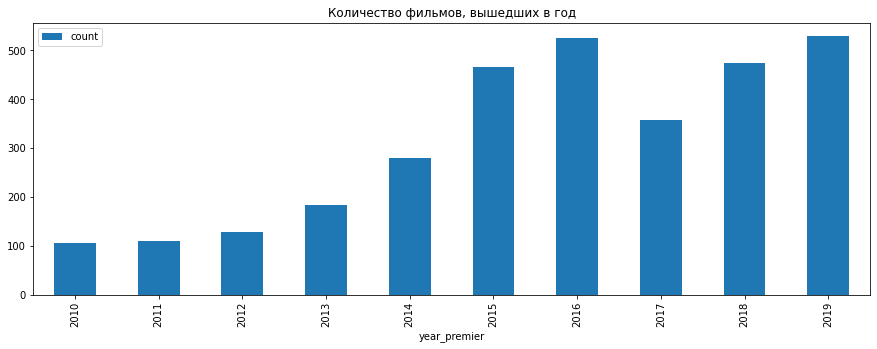

In [57]:
info_films_df.plot(title = 'Количество фильмов, вышедших в год', kind = 'bar', y = 'count', figsize = (15,5));

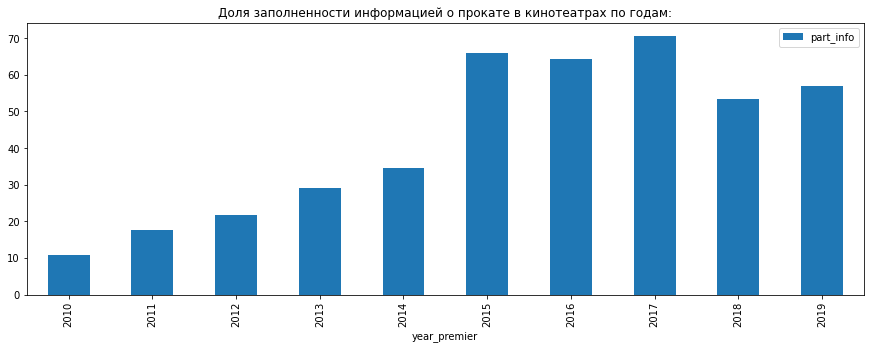

In [58]:
info_films_df.plot(title = 'Доля заполненности информацией о прокате в кинотеатрах по годам:', kind = 'bar', y = 'part_info', figsize = (15,5));

Наиболее полно представлены года с 2015 по 2017, в них доля фильмов, по которым представлены данные равны 65.96%, 64.30% и 70.69% соответственно

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

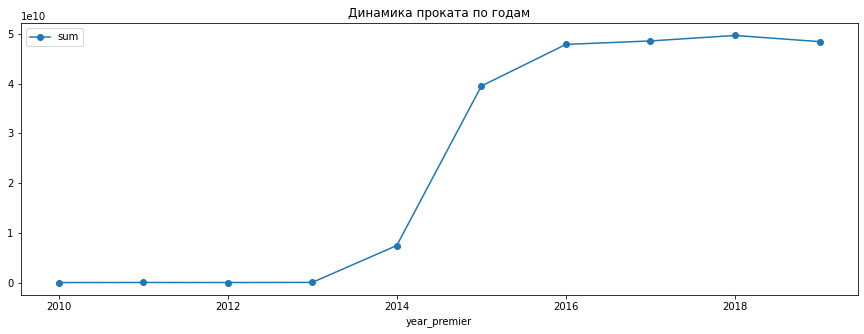

In [59]:
info_films_df.plot(title = 'Динамика проката по годам', y = 'sum', figsize = (15,5), style = 'o-');

In [60]:
print(f"В {info_films_df['sum'].idxmin()} году суммы сборов были минимальны, а в {info_films_df['sum'].idxmax()} максимальны")

В 2010 году суммы сборов были минимальны, а в 2018 максимальны


- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года. Сравните значения и сделайте выводы.

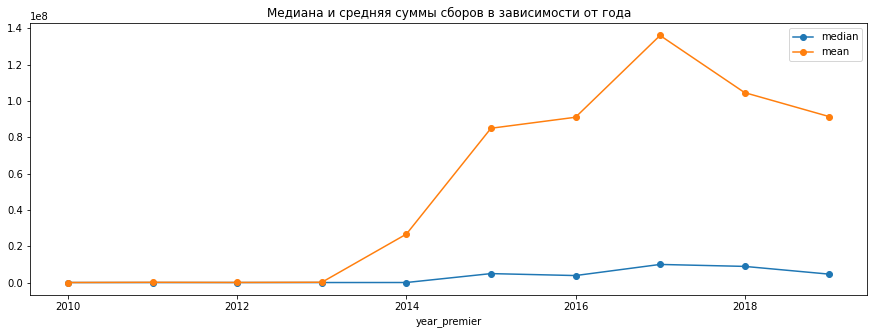

In [61]:
info_films_df.plot(title='Медиана и средняя суммы сборов в зависимости от года', kind='line', y=['median', 'mean'], figsize = (15,5), style = 'o-');

С 2013 года наблюдается резкий рост сборов по среднему на фильм. В то время как медиана соизмеримого роста не показывает

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [62]:
age_table = data[data['box_office'].notna()] \
                .pivot_table(index='year_premier',
                            columns='age_restriction',
                            values='box_office',
                            aggfunc='sum')

In [63]:
age_table

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year_premier,,,,,
2010,1887611.00,120146.00,366512.00,54385.00,NaN
2011,13499871.00,219891.00,381513.00,1040.00,450.00
2012,2266483.00,108734.00,3254216.00,182580.00,1143410.00
2013,2710302.50,20910336.50,658069.60,5161245.60,359752.00
2014,375562258.20,2584782324.00,544280086.70,2209712746.90,1730614443.40
2015,379054578.37,13616082008.91,11368120870.27,5432308367.44,8701799371.41
2016,150228848.67,12204446524.39,16664548541.74,6793929818.87,12053146008.24
2017,229598930.00,7851427660.67,18745042900.06,9651495581.02,12086142145.76
2018,32449002.11,14267291660.69,16503602346.96,8760085501.15,10104974623.41


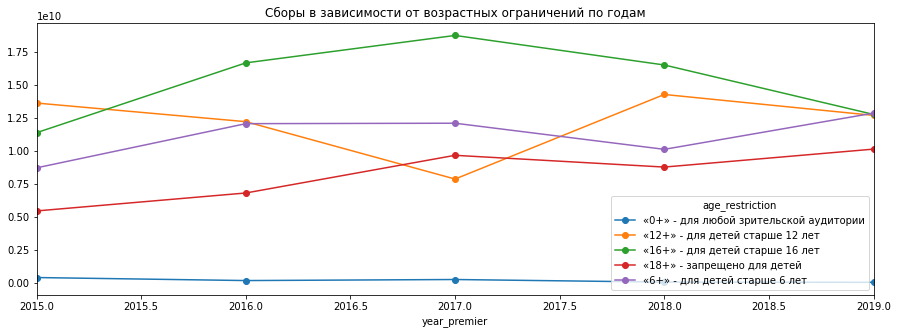

In [64]:
age_table.plot(title='Сборы в зависимости от возрастных ограничений по годам', kind='line', xlim=[2015, 2019], figsize = (15,5), style = 'o-');

In [65]:
sum_age = data[(data['year_premier']>=2015) & (data['year_premier']<=2019)].groupby('age_restriction')['box_office'].sum().to_frame()
sum_age

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,809077425.97
«12+» - для детей старше 12 лет,60619446628.33
«16+» - для детей старше 16 лет,76034733643.63
«18+» - запрещено для детей,40759615572.12
«6+» - для детей старше 6 лет,55798610799.68


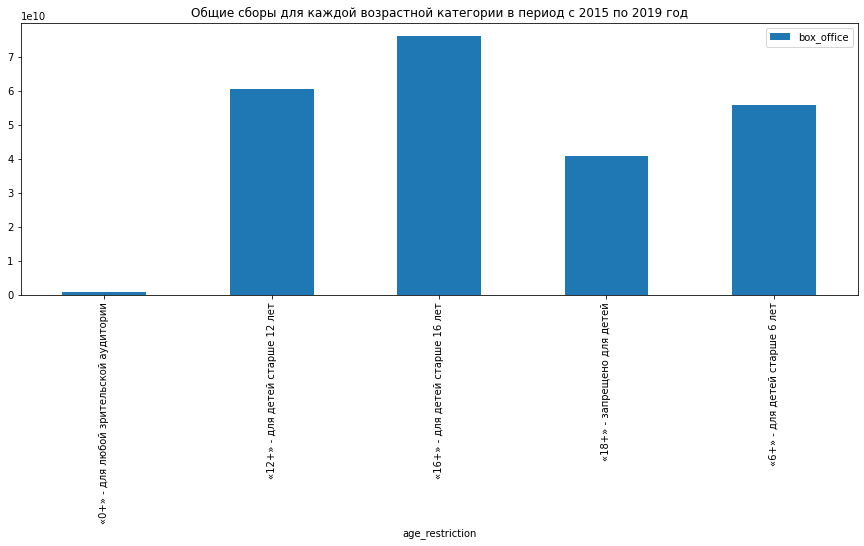

In [66]:
sum_age.plot(title = 'Общие сборы для каждой возрастной категории в период с 2015 по 2019 год', kind = 'bar', figsize = (15,5));

Можно заметить, что:
1. В период с 2016 по 2018 год фильмы для детей старше 16 лет собирали больше всего, в то время как фильмы с пометкой 0+ собирали в меньше всего
2. Заметен рост сборов для аудитории 18+
3. Присутствует обратная корреляция доходов между аудиториями 12+ и 16+. Предположу, что это связано с тем, что фильмы с 12+ получили более ужесточенные требования к рейтингу. И фильмы, которые могли быть записаны в 12 стали записываться как 16+
4. Можно сказать что возрастное ограничение влияет на количество сборов. Возможно это зависит в целом от предпочтений человека в зависимости от возраста и загрузки жизни. Людям от 18 практически некогда ходить в кино, как и детям младше 12, которые без людей старше 18 ходить в кино не могут. Поэтому и получается, что больше всего собирают такие возрастные группы как подростки 

## Шаг 4. Исследуйте фильмы, которые получили государственную поддержку
На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг. 

В данном задании я проверю:
- каким режиссерам чаще всего оказывают государственную поддержку при съемке кино;
- исследую долю возвратности государственных средств;
- оценю каким жанрам отдают предпочтение при государственной поддержке;
- какие жанры чаще всего окупаются;

Для начала выделим в отдельный датафрейм фильмы, которые получили государственную поддержку. А также создадим колонки, в которох будет содержаться;
- полная сумма, выделенной поддержки
- коэффициент возврата поддержки

In [67]:
data_gos_support = data.query('((refundable_support >= 0) | (nonrefundable_support>=0)) & (financing_source != "Отсутствует")').reset_index()
data_gos_support['all_support'] = data_gos_support['refundable_support']+data_gos_support['nonrefundable_support']
data_gos_support['payback_gos_support'] = ((data_gos_support['box_office']-data_gos_support['all_support'])/data_gos_support['all_support'])*100

In [68]:
data_gos_support

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,financing_source,ratings,genres,box_office,year_premier,main_director,main_genre,part_support,all_support,payback_gos_support
0,1281,пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"ано содействия развитию кинематографии ""ангел-фильм"", ооо ""кинокомпания отражение""",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,...,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,33.37,26500000.00,-98.62
1,1448,бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ооо ""компания ""атк-студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,...,Министерство культуры,NaN,Неизвестно,28140.00,2014,А.Якимчук,Неизвестно,70.00,26000000.00,-99.89
2,1498,невидимки,111004213,2013-09-10 12:00:00,Художественный,"ооо ""компания ""реал-дакота""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,...,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.Давлетьяров,комедия,61.27,107847945.00,-81.50
3,1524,берцы,111004314,2014-05-05 12:00:00,Художественный,"ооо ""студия ""пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,...,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.01,28000000.00,-99.80
4,1792,братья ч,111004414,2014-04-23 12:00:00,Художественный,"ооо ""студия ""пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,...,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,62.48,25000000.00,-99.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,7464,союз спасения,111022019,2019-12-26 12:00:00,Художественный,"зао ""дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,...,Фонд кино,6.00,"история,биография,драма",717703185.53,2019,А.Кравчук,история,51.02,500000000.00,43.54
328,7466,иван царевич и серый волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ооо ""студия анимационного кино ""мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,...,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00,2019,Д.Шмидт,мультфильм,52.63,100000000.00,401.07
329,7474,вторжение,111022519,2019-12-23 12:00:00,Художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,...,Фонд кино,5.70,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,52.97,500000000.00,NaN
330,7476,я свободен,111023019,2019-12-26 12:00:00,Художественный,"ао ""тпо ""киностудия им. м.горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,...,Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,65.00,30000000.00,NaN


Оценим для начала сколько выделяют средств на поддержку кино:

In [69]:
sns.set(rc={"figure.figsize":( 10 , 6 )})

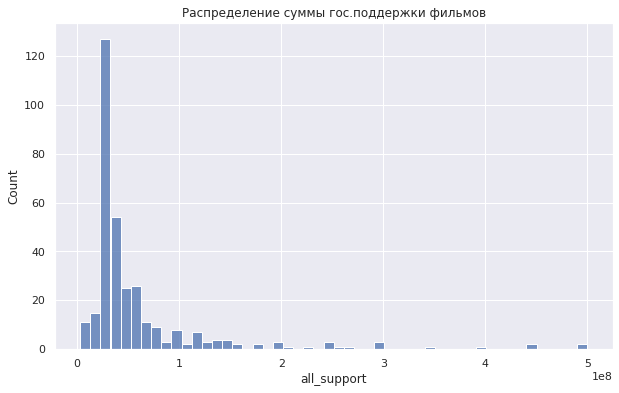

In [70]:
sns.histplot(data=data_gos_support, x= 'all_support').set(title = 'Распределение суммы гос.поддержки фильмов');

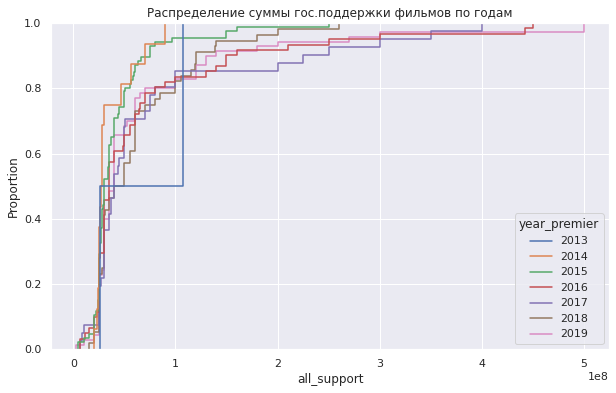

In [71]:
sns.ecdfplot(data=data_gos_support, x= 'all_support', hue = 'year_premier', palette = 'deep').set(title = 'Распределение суммы гос.поддержки фильмов по годам');

In [72]:
data_gos_support.groupby('year_premier')['all_support'].agg(['median', 'mean', 'count', 'sum']).style.background_gradient(cmap='RdYlGn')

,median,mean,count,sum
year_premier,,,,
2013,67173972.500000,67173972.500000,2,134347945.000000
2014,27500000.000000,35750143.687500,16,572002299.000000
2015,30000000.000000,42514435.569767,86,3656241459.000000
2016,35000000.000000,70543532.491803,61,4303155482.000000
2017,40000000.000000,77657845.414634,41,3183971662.000000
2018,45000000.000000,61553026.160714,56,3446969465.000000
2019,40000000.000000,70057142.857143,70,4904000000.000000


Можно заметить, что:
1. Пиковые годы в которые среднем выделялось больше всего средств - это 2016, 2017 год. 
2. Количество фильмов с государственной поддержкой резко выресло с 2013 до 2015 с 2 до 86 соответственно, а затем начало снижаться и выпускалось от 40 до 70 фильмов в год
3. Судя по распределниям, 80% фильмов получали не более 100млн поддержки. 50% не более 35млн
4. Наибольший объем поддержки по высокобюджетным фильмам пришелся на 2016, 2017, 2019 года
5. Суммарный объем инвестиций в поддержку кино стремительно рос с 2013 до 2016 с 134млн до 4,3млрд, затем можно увидеть спад к 2017 году до 3,1млрд, но к 2019 поддержка государством кино достигла пикового максимума в 4,9млрд

Оценим окупаемость государственной поддержки фильмов:

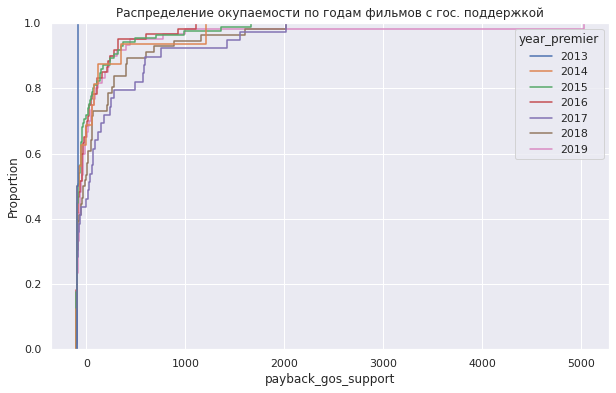

In [73]:
sns.ecdfplot(data=data_gos_support, x= 'payback_gos_support', hue = 'year_premier', palette = 'deep').set(title = 'Распределение окупаемости по годам фильмов с гос. поддержкой');

In [74]:
data_gos_support.groupby('year_premier')['payback_gos_support'].agg(['median', 'mean', 'min', 'max']).style.background_gradient(cmap='RdYlGn')

,median,mean,min,max
year_premier,,,,
2013,-90.058261,-90.058261,-98.621307,-81.495214
2014,-83.702547,56.370872,-99.891769,1211.148754
2015,-81.651666,35.405988,-99.995571,1662.320540
2016,-67.575556,27.879903,-99.982000,1112.076016
2017,31.020127,206.253082,-99.325952,2011.890836
2018,-21.555969,137.055949,-99.814383,2011.540889
2019,-53.130478,113.076477,-99.747167,5022.614485


Можно заметить, что;
1. 60% фильмов, не выходят в 0. В некоторых годах, не выходят в 0 даже 70%  фильмов
2. Самым успешным можно считать 2017 год, у которого окупились больше 50% фильмов
3. Однако самым успешным можно назвать кино, которое вышло в 2019 году. А именно фильм "Холоп"

Оценим, какой рейтинг имеют фильмы с каким процентом окупаемости:

In [75]:
data_gos_support['payback_gos_support_log'] = np.log(data_gos_support['payback_gos_support'])

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


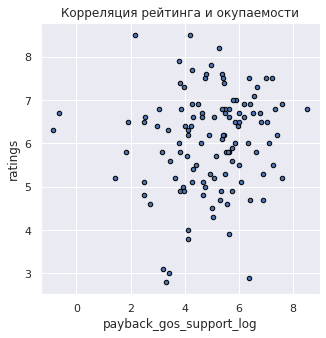

In [76]:
data_gos_support.plot(x='payback_gos_support_log', y='ratings', kind = 'scatter', figsize = (5,5), edgecolor='black', title = 'Корреляция рейтинга и окупаемости');

In [77]:
data_gos_support[['payback_gos_support','ratings']].corr()

,payback_gos_support,ratings
payback_gos_support,1.00,0.06
ratings,0.06,1.00


Исходя из этого графика и таблицы, можно сделать вывод, что рейтинги фильма никак не влияют на окупаемость

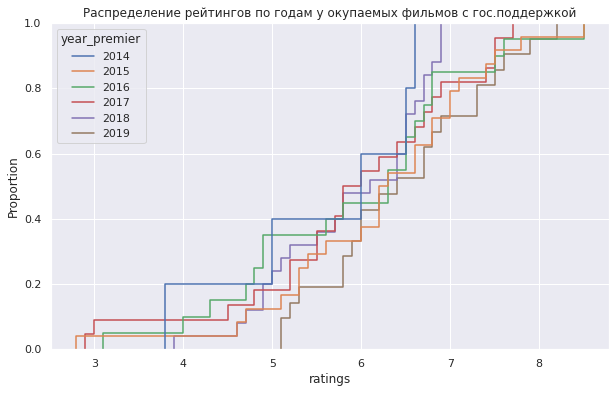

In [78]:
sns.ecdfplot(data=data_gos_support[data_gos_support['payback_gos_support']>=0], x= 'ratings', hue = 'year_premier', palette = 'deep').set(title='Распределение рейтингов по годам у окупаемых фильмов с гос.поддержкой');

In [79]:
data_gos_support[data_gos_support['payback_gos_support']>=0].groupby('year_premier')['ratings'].agg(['median', 'mean', 'min', 'max','count']).style.background_gradient(cmap='RdYlGn')


,median,mean,min,max,count
year_premier,,,,,
2014,6.000000,5.580000,3.800000,6.600000,5
2015,6.250000,6.200000,2.800000,8.500000,24
2016,6.300000,5.910000,3.100000,8.500000,20
2017,5.900000,5.890909,2.900000,7.700000,22
2018,6.100000,5.880000,3.900000,6.900000,25
2019,6.400000,6.461905,5.100000,8.200000,21


In [80]:
data_gos_support[data_gos_support['payback_gos_support']>=0]['ratings'].agg(['median', 'mean', 'min', 'max','count']).to_frame()

,ratings
median,6.20
mean,6.04
min,2.80
max,8.50
count,117.00


Можно заметить, что:
1. В среднем рейтинг окупаемых фильмов составляет 6,04 (медиана равна 6,2)
2. Максимум рейтинга, которые достигли окупившиеся фильмы, составляет 8,5. А именно это 2 фильма: А зори здесь тихие и Большой
3. Распределение рейтингов достаточно равномерное вокруг среднего, что можно заметить по графику

Теперь рассмотрим собственные гипотезы:
- каким главным режиссерам чаще всего оказывают государственную поддержку при съемке кино;

In [81]:
directors = data_gos_support.groupby('main_director')['title'].count().to_frame().sort_values(by='title', ascending = False)
directors.head(10)

,title
main_director,
Р.Давлетьяров,5
С.Андреасян,4
Д.Дьяченко,4
А.Котт,3
Н.Хомерики,3
К.Шипенко,3
Д.Шмидт,3
А.Цицилин,3
А.Аксененко,3


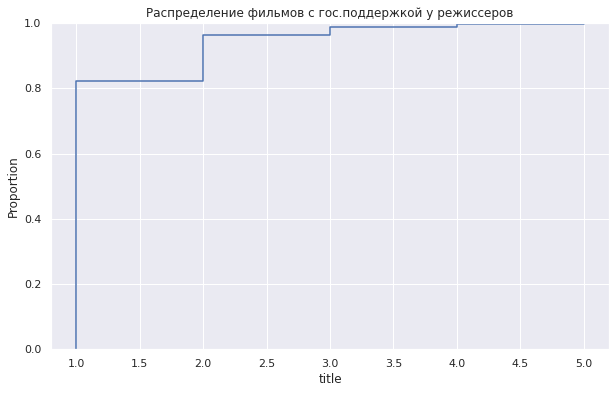

In [82]:
sns.ecdfplot(data=directors, x= 'title', palette = 'deep').set(title='Распределение фильмов с гос.поддержкой у режиссеров');


Можно заметить, что:
1. 80% режиссеров получают поддержку от государства только на 1 фильм. 4% режиссеров имеют 3 и более фильмов с гос.поддержкой
2. Чаще всего поддержку от государства получали: Р.Давлетьяров, С.Андреасян и Д.Дьяченко

- исследую долю возвратности государственных средств;

##### Сделано выше!

- оценю каким жанрам отдают предпочтение при государственной поддержке;
- какие жанры чаще всего окупаются;

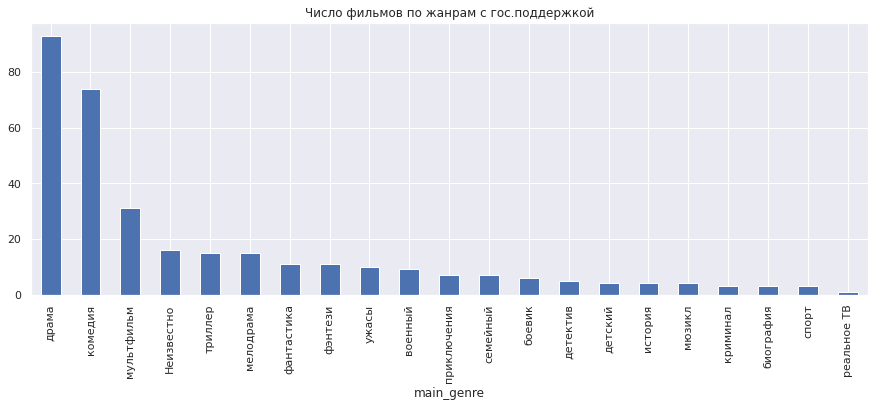

In [83]:
data_gos_support.groupby('main_genre')['main_genre'].count().sort_values(ascending = False).plot(kind = 'bar', title = 'Число фильмов по жанрам с гос.поддержкой', figsize = (15,5));

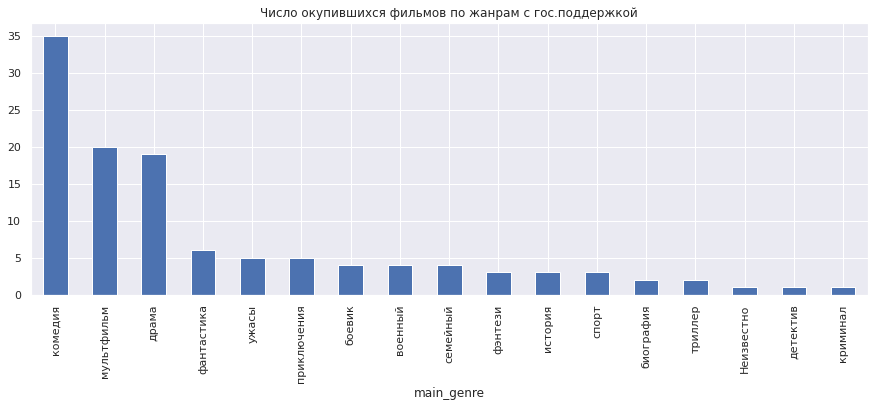

In [84]:
data_gos_support[data_gos_support['payback_gos_support']>=0].groupby('main_genre')['main_genre'].count().sort_values(ascending = False).plot(kind = 'bar', title = 'Число окупившихся фильмов по жанрам с гос.поддержкой', figsize = (15,5));

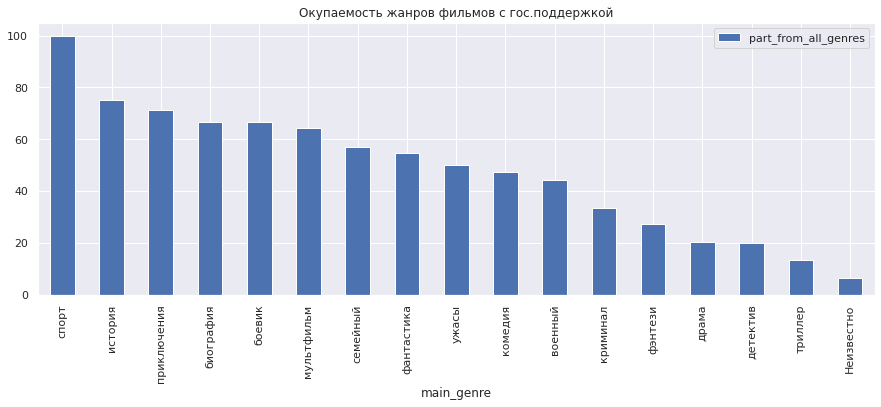

In [85]:
all_films_genre_df = data_gos_support.groupby('main_genre')['main_genre'].count().sort_values(ascending = False).to_frame()
payed_genres = data_gos_support[data_gos_support['payback_gos_support']>=0].groupby('main_genre')['main_genre'].count().sort_values(ascending = False).to_frame()
payed_genres['part_from_all_genres'] = payed_genres['main_genre']/all_films_genre_df['main_genre']*100
payed_genres.sort_values(by = 'part_from_all_genres', ascending = False).plot(kind = 'bar', title = 'Окупаемость жанров фильмов с гос.поддержкой', figsize = (15,5), y = 'part_from_all_genres');

Можно заметить, что:
1. Чаще всего отдают средства, направленные на поддержку фильмов, таким жанрам как: драммы - 93 фильма, комедии - 74 фильма и мультфильмы - 31 фильмы
2. Если оценивать окупаемость жанра по количеству окувшихся фильмов, то топ-3 занимают жанры: комедия - 35 фильмов, мультфильмы - 20 фильмов и драмы - 19 фильмов. В первую очередь это связано с тем, что фильмы этих жанров просто снимают больше.
3. Однако если оценивать показатели окупаемости жанра как процент окувшихся фильмов среди общего количества фильмов этого же жанра, то картина будет совсем другой, а именно: спорт - 100% окупаемости, история - 75% окупаемости и приключения - 75% окупаемости

## Вывод

Изучив полученные данные, а именно два датафрейма, было принято решение объединить их в один для удобства последующего анализа данных (на пути были решены проблемы объединения баз, такие как разница в типе данных ключевого столбца. Устранив данную ошибку, объединение прошло успешно и без потерь, что было продемонстрировано в работе). В дальнейшем были предприняты попытки по предобработке данных, чтобы в дальнешем полученные выводы были достоверны. Поэтому прежде всего были обработаны типы данных (а именно приведены к привычному виду колонка, отвечающая за дату премьеру, а также была выявлена аномалия в колонке рейтинга. Чтобы перевести ее к подходящей ей типу данных, отображение рейтинга было приведено к единому формату и в последующем изменение формата прошло успешно). После этого я приступила к обработке пропусков. Дабы не потерять данные, были заполнены все пропуски насколько это было возможно. Пустующим разве что остались колонки с бюджетом, сборами и рейтингов. Но их было невозможно заполнить поскольку это значащие параметры, сильно зависящие от других. И чтобы не исказить картинку при анализе, пропуски в этих колонках я оставила пустыми. Следующем при обработке данных стали дубликаты. В основном это коснулось категориальных значений. Чтобы убрать неявные дубликаты были предприняты успешные попытки по устранению лишних пробелов, замене знаков препинания или же их устранение (как в колонке с названием фильма). После были изучены категориальные параметры и была выявлена следующая аномалия: при наличии гос.поддержки и имеющейся информации о ее объеме, бюджет был равен 0 (однако таких строчек в базе было достаточно мало). Чтобы устранить данную проблему была расчитана медиана процента господдержки от общего бюджета. И так был вычислен бюджет для аномальных строк. После предобработки данных я приступила к исследованию

В процессе изучения было выявлено, что:
- Наиболее полно представлены года с 2015 по 2017, в них доля фильмов, по которым представлены данные равны 65.96%, 64.30% и 70.69% соответственно;
- В 2010 году суммы сборов были минимальны (2428654 рублей), а в 2018 максимальны (49668403134.32 рублей);
- С 2013 года наблюдается резкий рост сборов по среднему на фильм;
- На сумму сборов абсолютно точно влияет возрастное ограничение. Была выдвинута гипотеза, что возможно зависимость присутствует из-за предпочтения и загруженности человека в зависимости от года;
- Фильмы категории 16+ собрали больше всего в период с 2016 по 2018 год;

В дальнейшем мною были выдвинуты собственные гипотезы и я получила следующие выводы:
- Пиковые годы в которые среднем выделялось больше всего средств - это 2016, 2017 год, 70543532 рублей и 77657845.41 рублей соответственно;
- 80% фильмов получали не более 100млн поддержки. 50% не более 35млн;
- 60% фильмов, не выходят в 0. В некоторых годах, не выходят в 0 даже 70% фильмов;
- Самым успешным можно считать 2017 год, у которого окупились больше 50% фильмов;
- Самым успешным можно назвать кино, которое вышло в 2019 году. А именно фильм "Холоп";
- На окупаемость фильма не влияет его рейтинг;
- В среднем рейтинг окупаемых фильмов составляет 6,04 (медиана равна 6,2);
- Максимум рейтинга, которые достигли окупившиеся фильмы, составляет 8,5. А именно это 2 фильма: А зори здесь тихие и Большой;
- 80% режиссеров получают поддержку от государства только на 1 фильм. 4% режиссеров имеют 3 и более фильмов с гос.поддержкой;
- Чаще всего поддержку от государства получали: Р.Давлетьяров, С.Андреасян и Д.Дьяченко;
- Чаще всего отдают средства, направленные на поддержку фильмов, таким жанрам как: драммы - 93 фильма, комедии - 74 фильма и мультфильмы - 31 фильма;
- Если оценивать показатели окупаемости жанра как процент окувшихся фильмов среди общего количества фильмов этого же жанра, то картина будет совсем другой, а именно: спорт - 100% окупаемости, история - 75% окупаемости и приключения - 75% окупаемости;
- Если оценивать окупаемость жанра по количеству окувшихся фильмов, то топ-3 занимают жанры: комедия - 35 фильмов, мультфильмы - 20 фильмов и драмы - 19 фильмов. В первую очередь это связано с тем, что фильмы этих жанров просто снимают больше;